

<center><img src="pngs/20220926_hackathon_nlp_track.png" style="border-radius:15px"></center>

# <b><div style="color:#211894;font-size:100%;text-align:center">Welcome to the NLP Track of the Hackathon! Part 1 of 2: Training on Habana Gaudi 🚀</div></b>

<h1><center>Author: Benjamin Consolvo <br></center></h1>


# <a id="TOC">Table of Contents</a> 
- [1. Introduction: Problem Statement, Model Architecture, Hardware, and Software](#introduction)  
- [2. Importing of Libraries](#install)  
- [3. Exploratory Data Analysis (EDA) and Tokenization](#eda)  
- [4. Model Training on Habana Gaudi HPU](#train)
- [5. Model Performance and Sample Inference](#inference)
- [6. Summary](#summary)
- [7. References](#references)


<a id="introduction"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">1. Introduction: Problem Statement, Model Architecture, Hardware, and Software</div>

Hello and welcome to this NLP deep learning notebook! I first am going to briefly spend some time introducing the problem, the model architecture, the hardware, and the software we will be using in two companion notebooks. During the demo, I have already run all the cells so that you are not sitting and waiting for anything, but you are of course encouraged to run them yourself and to change as much as you’d like.

I made a video introduction to the notebook here: https://www.intel.com/content/www/us/en/developer/videos/ai-for-social-good-hackathon.html

Timestamps:
#### Notebook 1 of 2 - Habana Training Demo
- 0:00 - 1. Introduction  
    - 0:25 - Problem Statement
    - 1:25 - Model Architecture - DistilBERT
    - 1:50 - Hardware - Habana® Gaudi® HPU and 3rd Generation Intel® Xeon®
    - 3:15 - Monitoring compute
    - 3:55 - Software 
- 5:10 - 2. Importing of Libraries
- 6:13 - 3. Exploratory Data Analysis (EDA) and Tokenization
    - 7:27 - Tokenization
    - 9:20 - Histogram and word cloud
    - 11:06 - `torch.tensor` format
- 11:54 - 4. Model Training on Habana® Gaudi® HPU 
    - 11:54 - Setting up training
    - 13:42 - Training the model
- 15:09 - 6. Model Performance and Sample Inference
    - 15:19 - Inference on unseen test dataset
    - 15:58 - Inference on Single Sample
- 17:16 - 8. Summary 
- 18:39 - 9. References

#### Notebook 2 of 2 - Quantization Demo
- 19:03 - 1. Introduction
- 19:32 - 2. Importing of Libraries
- 20:08 - 3. Data Loading
- 20:22 - 4. Quantization
- 22:46 - 5. Model Inference on Intel Gen. 3 Xeon CPU
    - 23:03 - FP32 model
    - 23:26 - INT8 model
- 23:54 - 6. Summary
- 24:20 - END

#### Problem Statement
In a world where negativity in speech and media is prominent, humor can help uplift the human spirit. “How to create a method or model to discover the structures behind humor, recognize humor … remains a challenge because of its subjective nature” ([Jain, 2017](https://core.ac.uk/download/pdf/234824434.pdf)). Machine learning and deep learning has been progressing to produce powerful language models. The proposed challenge here is to teach a computer how to distinguish between an humorous and non-humorous statement in English.

In the first of two Jupyter notebooks, we will train a binary text classification model to determine if a statement is humorous. For the demonstration, I will only use a small portion of the data for training. 
- You are encouraged to use more/all of the data to improve the efficacy of your model.
- You are also encouraged to experiment with data tokenization, preprocessing, and augmentation.

In the second Jupyter notebook, we will increase the performance of prediction (or inference) in a simulated production environment.



#### Model Architecture
- Today, we will use a distilled version of the BERT transformer-based model architecture, called DistilBERT (https://arxiv.org/abs/1910.01108). You can find a description of the model on Huggingface here: https://huggingface.co/distilbert-base-uncased. It is a smaller, faster, distilled version of BERT.   You are free and encouraged to experiment with other architectures.   
- BERT stands for Bidirectional Encoder Representations for Transformers, and it is a deep learning model for natural language processing (NLP) that can be used for a variety of language tasks. 


#### Hardware

##### Habana® Gaudi® HPU
- For the first notebook, we will be training our model using a Habana® Gaudi® HPU (Habana Processing Unit) accelerator, hosted on AWS. The instance is an Amazon EC2 dl1.24xlarge (https://aws.amazon.com/ec2/instance-types/dl1/). It is an 8x parallel accelerator (HPU) that beats comparable GPU-based instances "by up to 40%" and at a much-reduced cost (https://habana.ai/training/gaudi/). 

- Due to the smaller size of the dataset and relatively low training time, I am only covering single-HPU training here, but if you would like to try distributed training over multiple HPUs, you can visit the Optimum Habana GitHub repository to learn from the examples of distributed training there (https://github.com/huggingface/optimum-habana/tree/main/examples/text-classification).

- The Habana® Gaudi® DL1 instances come with 96 2nd Generation Intel® Xeon® vCPUs (48 physical cores).

##### 3rd Generation Intel® Xeon® Platinum 8375C Ice Lake CPU
- In the second notebook, I will be showing you how to speed up inference time using a technique called “quantization” on a production-capable 3rd Generation Intel® Xeon® Platinum 8375C Ice Lake CPU (https://ark.intel.com/content/www/us/en/ark/products/series/204098/3rd-generation-intel-xeon-scalable-processors.html). This instance is called m6i.*xlarge on AWS.



##### 4rd Generation Intel® Xeon® Sapphire Rapids CPU

- Intel will be releasing a 4th Generation Xeon® Sapphire Rapids CPU processor with Advanced Matrix Extension that will be able to offer a performance speed improvement for inference of up to 8X on INT8 model as compared to INT8 on the 3rd Generation Xeon® Ice Lake CPU. For more information about the upcoming performance benefits, you can visit:
    - https://edc.intel.com/content/www/us/en/products/performance/benchmarks/architecture-day-2021/?r=1156525610

##### Pro tips for monitoring compute
- To actively monitor the compute on the HPUs, you can use `watch hl-smi`, similar to `watch nvidia-smi` on NVIDIA GPUs.
- To monitor the compute on the CPU cores and memory usage, you can use `htop` in the command line. And to get a printout of the CPU information, you can use a command called `lscpu`.

In [2]:
!hl-smi #hpu information

+-----------------------------------------------------------------------------+
| HL-SMI Version:                                 hl-1.6.1-fw-37.2.0          |
| Driver Version:                                      1.6.0-3c06a7c          |
|-------------------------------+----------------------+----------------------+
| AIP  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | AIP-Util  Compute M. |
|===============================+======================+======================|
|   0  HL-205              N/A  | 0000:90:1d.0     N/A |                   0  |
| N/A   37C   N/A    99W / 350W |    512Mib / 32768Mib |     1%           N/A |
|-------------------------------+----------------------+----------------------+
| Compute Processes:                                               AIP Memory |
|  AIP       PID   Type   Process name                             Usage      |
|=======================================

In [3]:
!lscpu #cpu information

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          96
On-line CPU(s) list:             0-95
Thread(s) per core:              2
Core(s) per socket:              24
Socket(s):                       2
NUMA node(s):                    2
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           85
Model name:                      Intel(R) Xeon(R) Platinum 8275CL CPU @ 3.00GHz
Stepping:                        7
CPU MHz:                         2999.998
BogoMIPS:                        5999.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       1.5 MiB
L1i cache:                       1.5 MiB
L2 cache:                        48 MiB
L3 cache:                        71.5 MiB
NUMA node0 CPU(s):           

Though we are using these specific hardware architectures, I have attempted to make the code as accessible as possible by offering alternative code in the notebooks for other hardware.

#### Software

I will now briefly highlight some of the key Python libraries I will be using in the two notebooks. 
- We will be using the Habana SynapseAI fork of PyTorch. It looks and feels much like the stock PyTorch, but it has been optimized for Habana® Gaudi® HPUs.
- Stock CPU PyTorch (https://pytorch.org/get-started/locally/) for inference.
- The Huggingface 🤗 `transformers` library is what we are using to pull our DistilBERT pre-trained model from and the associated configuration prior to training.
- For setting up the training, we will be using `optimum.habana`, which is “the interface between the Transformers library and Habana’s® Gaudi® HPU” (https://github.com/huggingface/optimum-habana).  
- To speed up model inference, we will be using `optimum.intel`, which is “the interface between the Transformers library and the different tools and libraries provided by Intel to accelerate end-to-end pipelines on Intel architectures.” (https://github.com/huggingface/optimum-intel). In particular, the Intel Neural Compressor (INC) is used in the backend for quantization of a model from FP32 to INT8.


## <span style="color:#211894;font-size:100%;text-align:left">Evaluation Guidelines</span>

#### Judging criteria:
    - 70% F1 score
    - 30% Inference speed
Make your model as fast as possible during inference, while retaining a high F1 score!



<a id="install"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">2. Importing of Libraries</div>


We now move onto the second main section: “Importing of Libraries”.

Before importing tools, I just run these couple of lines starting with `%load_ext autoreload` to automatically reload any updated local Python libraries into the Jupyter notebook. 

In [1]:
%load_ext autoreload
%autoreload 2

In case you need to install PyTorch in your environment, here is more information:

##### Installing Habana SynapseAI PyTorch:
If using Habana Gaudi HPUs, the official Habana SynapseAI PyTorch installation guide can be found here: https://docs.habana.ai/en/latest/Installation_Guide/index.html

##### Installing Stock PyTorch:
For stock PyTorch if you are on other hardware, you can install it with the instructions here: https://pytorch.org/get-started/locally/


I have divided the importing of Python libraries into two main cells: 
1. The first cell is for the libraries that can be loaded and work on any hardware, including `torch`, `pandas`, and `transformers`.
2. The second cell is for the Habana®-specific frameworks for training on the HPU, including `optimum.habana`


In [5]:
## Importing libraries for any hardware.
import torch
import os
import time
from botocore.session import Session

import sys
sys.path
sys.path.append('../src/')
import nlpload, evaluate


import pandas as pd
from datasets import load_metric
import matplotlib.pyplot as plt
from tqdm import tqdm

from transformers import (
    DistilBertConfig, 
    AutoConfig, 
    DistilBertTokenizerFast, 
    DistilBertForSequenceClassification,
    AutoModelForSequenceClassification,
    Trainer, 
    TrainingArguments,
    EvalPrediction, 
    default_data_collator
)
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import logging
logger = logging.getLogger(__name__)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
##These lines are necessary to use the Habana hardware.
from optimum.habana import GaudiTrainer, GaudiTrainingArguments #for Huggingface optimum[habana] version to use on Habana Gaudi
from habana_frameworks.torch.utils.library_loader import load_habana_module 
import habana_frameworks.torch.core as htcore
load_habana_module()

Loading Habana modules from /usr/local/lib/python3.8/dist-packages/habana_frameworks/torch/lib


Here, we declare which device to use during training and inference for `torch`. For this notebook, we select `hpu`, but there are others listed pertaining to other hardware, depending on your hardware.

In [7]:
# device = torch.device('gpu') #NVIDIA-GPU
# device = torch.device('cpu') #CPU-only
# device = torch.device('mps') #Mac M1/M2 GPU
device = torch.device('hpu') #Habana HPU

<a id="eda"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">3. Exploratory Data Analysis (EDA) and Tokenization</div>




Let’s now look at the data! Keep in mind that similar processing and model building could be used for any binary text classification dataset. We are working with a humor/not humor dataset. The data consist of a piece of text and an associated humor label of False or True. Our goal is to train a model to obtain the highest possible F1 score on an unseen test dataset, as well as achieve the fastest inference speed. The F1 score is based on a combination of precision and recall according to

$$
F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN},
$$

where `TP = True Positive`, `FP = False Positive`, and `FN = False Negative`.

The data can be found here:
https://www.kaggle.com/datasets/deepcontractor/200k-short-texts-for-humor-detection

Download the CSV, and then you can import it with `pandas`.

In [8]:
hdf = pd.read_csv('data/dataset.csv')
hdf

,text,humor
0,When is the best time to play racquet sports? ...,True
1,City apartments vs. suburban living: which one...,False
2,San francisco approves health warnings on ads ...,False
3,"How white privilege, white supremacy and insti...",False
4,The oil lobby has a pretty predictable respons...,False
...,...,...
129995,Southern california finds itself waist-deep in...,False
129996,I knew someone who poured milk before the cere...,True
129997,What does tarzan sing at christmas? jungle bells,True
129998,An open letter to state farm about climate denial,False


In [9]:
hdf["label"] = hdf["humor"].astype(int) #convert True/False into a 0 or a 1
hdf

,text,humor,label
0,When is the best time to play racquet sports? ...,True,1
1,City apartments vs. suburban living: which one...,False,0
2,San francisco approves health warnings on ads ...,False,0
3,"How white privilege, white supremacy and insti...",False,0
4,The oil lobby has a pretty predictable respons...,False,0
...,...,...,...
129995,Southern california finds itself waist-deep in...,False,0
129996,I knew someone who poured milk before the cere...,True,1
129997,What does tarzan sing at christmas? jungle bells,True,1
129998,An open letter to state farm about climate denial,False,0


For this demonstration, I am only going to make use of 10% of the samples from the humor dataset so that everything is very fast for the demo. But you will likely want to use as much of the data as you can in your training, keeping in mind that you will want to keep a subset of the data for holdout to test your model inference.

In [10]:
hdf2 = hdf.sample(frac=0.10).reset_index(drop=True)

In [11]:
hdf2

,text,humor,label
0,How do you stop an internet troll? seize their...,True,1
1,There are 10 kinds of people: those who can re...,True,1
2,Training tips from olympic basketball player t...,False,0
3,'game of thrones'-obsessed dad parodies show's...,False,0
4,When you said coke i assumed you meant cocaine...,True,1
...,...,...,...
12995,What's brightly coloured and looks good on rav...,True,1
12996,How does twitch (streaming site) chat make mon...,True,1
12997,How do you keep a hard on? don't fuck with it.,True,1
12998,What do a communist and communism itself have ...,True,1


So hdf2 is a 10% portion of the whole dataset.

Using numpy, we can split up the data into training, validation, and test sets.

In [12]:
#80, 10, 10 split 
train, val, test = np.split(hdf2.sample(frac=1, random_state=42), 
                       [int(.9*len(hdf2)), int(.95*len(hdf2))])

In [13]:
train

,text,humor,label
3615,"What is black, white, and red all over? the fe...",True,1
2536,Skydiver luke aikins makes jump without a para...,False,0
5397,How do you outsmart a chicken? by thinking out...,True,1
9982,Taylor swift gives surprise performance at caf...,False,0
1498,Bacon and eggs walk into a bar bartender says:...,True,1
...,...,...,...
8577,I'm right 97% of the time. so who cares about ...,True,1
7973,Why doesn't the sun go to college? because he ...,True,1
12105,Albert einstein's brain: 12 facts about gray m...,False,0
1625,"Free will is good, but free pizza is better.",True,1


In [14]:
val

,text,humor,label
8766,Injuries at extreme park course mar women's sn...,False,0
7970,How do we know mayberry's andy taylor was a re...,True,1
4212,Senate democrats boycott key votes on 2 top tr...,False,0
6456,Breast cancer treatment: fda to let women try ...,False,0
3507,These donald trump masks are the scariest thin...,False,0
...,...,...,...
10011,Here's a bit of advice for you. advi.,True,1
2502,Candy corn is the rare candy that's worse than...,True,1
4360,A better leader by sitting in front of your co...,False,0
4171,Have you ever heard of the movie constipation?...,True,1


In [15]:
test

,text,humor,label
12690,Did you know that pi day is tomorrow? i didn't...,True,1
395,Jay mohr apologizes on his blog for fat-shamin...,False,0
7186,North korea warns of 'merciless' strikes as u....,False,0
12770,The day howard dean came this close to leaving...,False,0
4492,Even though i'm a guy i still get nervous when...,True,1
...,...,...,...
11964,Amy adams golden globes dress 2013: see her re...,False,0
5191,"Fake cop pulls over real cop, gets real charge",False,0
5390,How to avoid sending the wrong message with el...,False,0
860,The hardest part about eating a vegetable... m...,True,1


### Tokenization

To fine-tune train an NLP model, we must first tokenize the text data. Tokenizing the text data is a process where we convert each set of text into a vector of integers, each word, set of words, or symbol converting to a number according to a vocabulary tokenizer. You are free and encouraged to experiment with alternate tokenization methods to improve your model, as well as change the model architecture altogether! 
    
Here is some more information about the DistilBERT config that we are using here for our model.


In [16]:
DistilBertConfig()

DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "transformers_version": "4.21.1",
  "vocab_size": 30522
}

I instantiate the tokenizer here by pulling from DistilBertTokenizerFast, and we can see some of the configurations of the tokenizer below. The word vocabulary size is 30,522, padding the vector is to the right, and there is a list of some special sokens, including the separator token SEP and the pad token PAD. 

In [17]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Now that we have instantiated the tokenizer, we can tokenize the text data from text to a vector of integers. 

Always pad to a certain length of integers (50 works here) to be consistent across all datasets. The model always expects the same input size.

In [18]:
train_encodings = tokenizer(list(train['text']), padding='max_length', truncation=True, max_length=50) 
val_encodings = tokenizer(list(val['text']), padding='max_length', truncation=True, max_length=50)
test_encodings = tokenizer(list(test['text']), padding='max_length', truncation=True, max_length=50)

Once tokenized, we can see that the data have two keys: `input_ids` and `attention_mask` (see https://huggingface.co/transformers/v2.11.0/glossary.html#input-ids)

In [19]:
test_encodings.keys()

dict_keys(['input_ids', 'attention_mask'])

<b>input_ids</b>: "The input ids are often the only required parameters to be passed to the model as input. They are token indices, numerical representations of tokens building the sequences that will be used as input by the model."

<b>attention_mask</b>: "The attention mask is an optional argument used when batching sequences together. This argument indicates to the model which tokens should be attended to, and which should not."



Now, let's explore the values of the data. We can look at a histogram of the length of characters in the text samples we have in the training dataset.

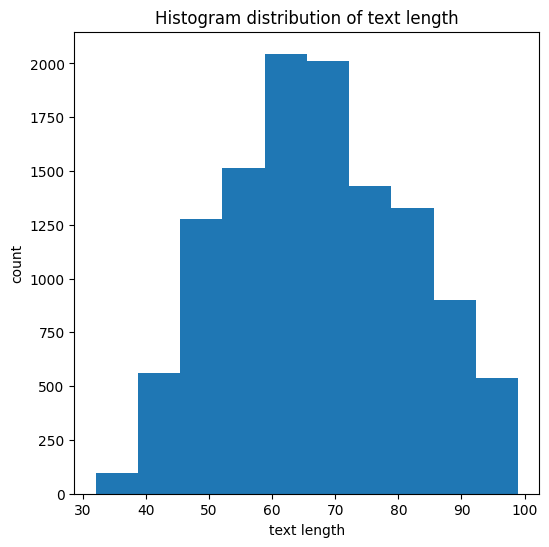

In [20]:
text_len = [len(x) for x in list(train['text'])]

fig, ax = plt.subplots(figsize=(6, 6))
plt.hist(text_len)
plt.xlabel("text length")
plt.ylabel("count")
plt.title("Histogram distribution of text length")
plt.show()

Let's look at which words are the most common, and which words are the least common with a word cloud. First, let’s look at the non-humorous training data. 

In [21]:
#for non-humorous

# list_words_add = ['user','none'] #if you want to add to the list of stopwords not to be contained in the word cloud. There are some in there already.
# STOPWORDS.update(list_words_add)

all_nonhumorous_words = ''
for idx,text_data in enumerate(list(train['text'])):
    if list(train['label'])[idx] == 0:
        all_nonhumorous_words += ' ' + text_data.strip() 
        
wc = WordCloud(width=1024,height=1024, min_font_size=8, stopwords=STOPWORDS).generate(all_nonhumorous_words)

In the word cloud, there are certain words called “STOPWORDS” which are very common words that we exclude from the word cloud to make it more interesting, but you can use an empty list instead if you would like to include all the common words like “don’t”, “to”, etc. 


In [22]:
for idx,word in enumerate(STOPWORDS):
    print(word)
    if idx==5:
        break

here
against
me
and
have
who's


We concatenate all the words into a large string, and we can look at a sample of the non-humourous words, and the length of the whole string. 

In [23]:
#Let's look at a sample of the nonhumourous words
all_nonhumorous_words[0:500]

' Skydiver luke aikins makes jump without a parachute Taylor swift gives surprise performance at cafe where she was discovered Lorde wears her crown in the march issue of vogue (photo) The white house fence could get even higher if this plan is approved Avalanche engulfs skiers at japanese resort, killing 1 Kathy griffin drops f-bomb while taking back her apology to trump How to pop your collar without looking like a bro Women in business q&a: denise g. tayloe co-founder, ceo & president, privo B'

In [24]:
len(all_nonhumorous_words)

383924

And now we can see a plot of the word cloud, with the more common words appearing larger.

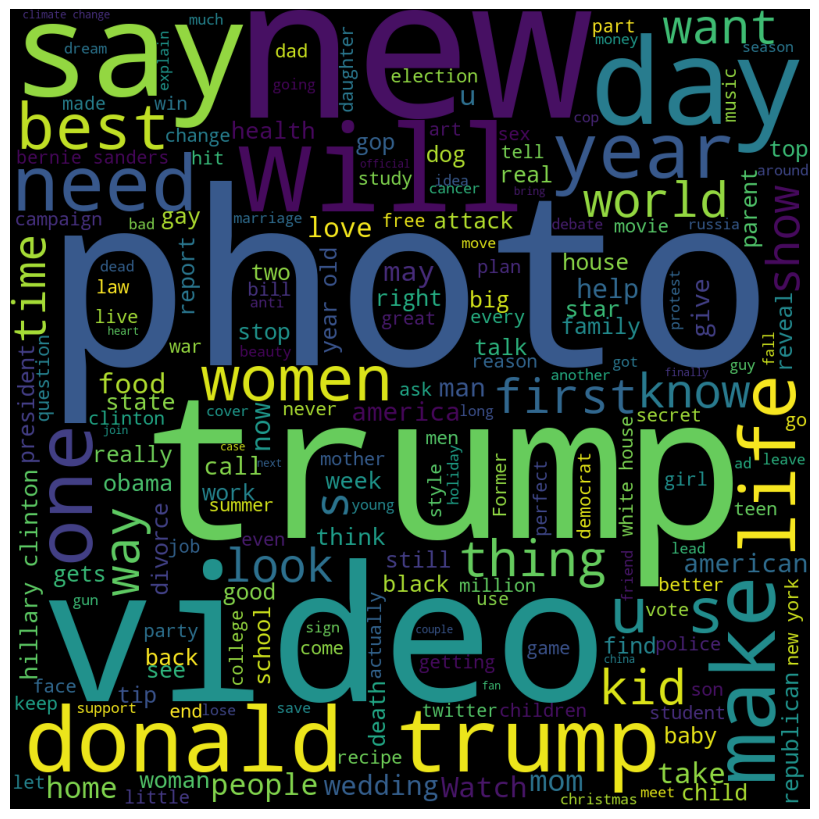

In [25]:
#Plotting the wordcloud for nonhumorous
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We can go through the same process for humorous phrases and plot a similar word cloud.

In [26]:
#for humorous

# list_words_add = ['user'] #if you want to add more stopwords not to be contained in the word cloud.
# STOPWORDS.update(list_words_add)

all_humorous_words = ''
for idx,text_data in enumerate(list(train['text'])):
    if list(train['label'])[idx] == 1:
        all_humorous_words += ' ' + text_data.strip() 
        
wc2 = WordCloud(width=1024,height=1024, min_font_size=8, stopwords=STOPWORDS).generate(all_humorous_words)

In [27]:
all_humorous_words[0:500]

" What is black, white, and red all over? the ferguson riots How do you outsmart a chicken? by thinking outside the bawks. Bacon and eggs walk into a bar bartender says: i'm sorry, we don't serve breakfast. I've never been a fan of phone sex... ... mostly because they're made out of really hard plastic. Did you hear about the cartoonist being investigated? police on the case say he has a sketchy past. Wanna ruin a girl's day? respond to her next text with who is this? Why do teenage girls go to t"

In [28]:
len(all_humorous_words)

415520

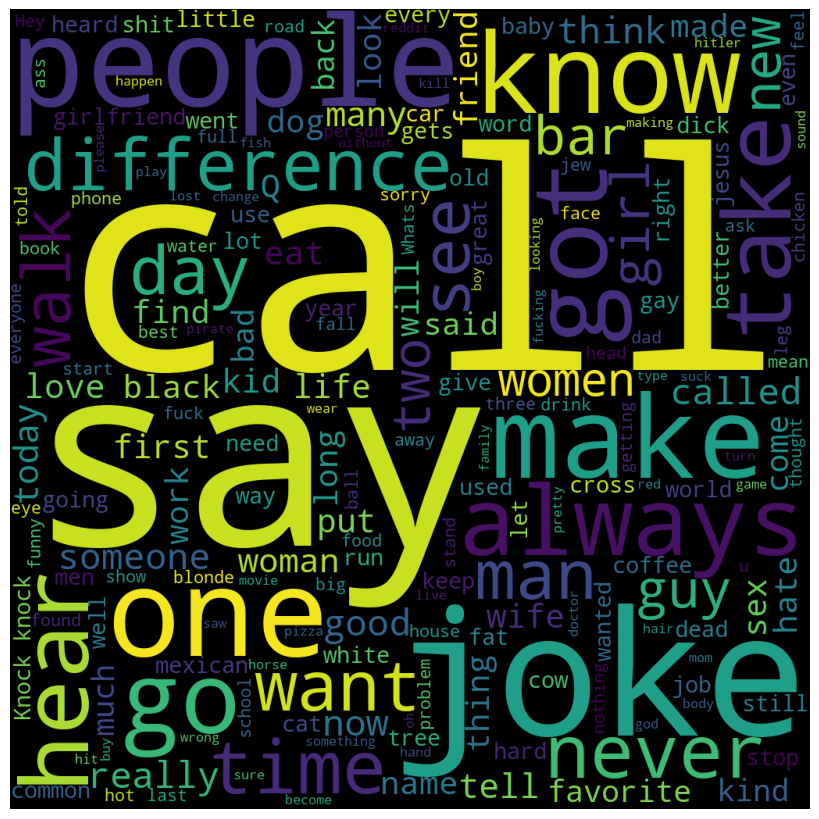

In [29]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc2)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Now that we have tokenized the data, we need to put the dataset in the `torch.tensor` format that PyTorch expects before training. 

In [30]:
class newDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [31]:
train_dataset = newDataset(train_encodings, list(train['label']))
val_dataset = newDataset(val_encodings, list(val['label']))
test_dataset = newDataset(test_encodings, list(test['label']))

Now that we’ve completely prepared the data, we can look at an example of the original dataset and after preprocessing it for training. 

In [32]:
device = torch.device('hpu')
# device = torch.device('cpu') # if training on CPU
index = torch.LongTensor(test_dataset[0]['input_ids']).to(device).unsqueeze(0)
attn_mask =  torch.LongTensor(test_dataset[0]['attention_mask']).to(device).unsqueeze(0)
print(f"Original sentence = {list(test['text'])[0]}")
print(f"Original label = {list(test['label'])[0]}.")
print(f"Original humor = {list(test['humor'])[0]}.")
print(f'index={index}')
print(f'attn_mask={attn_mask}')

Original sentence = Did you know that pi day is tomorrow? i didn't, because there have been 0 sines
Original label = 1.
Original humor = True.
index=tensor([[  101,  2106,  2017,  2113,  2008, 14255,  2154,  2003,  4826,  1029,
          1045,  2134,  1005,  1056,  1010,  2138,  2045,  2031,  2042,  1014,
          8254,  2229,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]],
       device='hpu:0')
attn_mask=tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]], device='hpu:0')


We can see that we do have some padded 0's on the index, and we also do see with the attention mask that we are ignoring these pads for training. <br>

We can also decode the data from a vector of integers back to text with the tokenizer.

In [33]:
decoded = tokenizer.decode(test_dataset[0]['input_ids']) 
decoded

"[CLS] did you know that pi day is tomorrow? i didn't, because there have been 0 sines [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"

In [34]:
list(test['label'])[0] #0 = nonhumorous, 1=humorous

1

In [35]:
test_dataset[0]

{'input_ids': tensor([  101,  2106,  2017,  2113,  2008, 14255,  2154,  2003,  4826,  1029,
          1045,  2134,  1005,  1056,  1010,  2138,  2045,  2031,  2042,  1014,
          8254,  2229,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 'labels': tensor(1)}

<a id="train"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background:linear-gradient(90deg, navy, #dc98ff, #251cab);overflow:hidden">4. Model Training on Habana® Gaudi® HPU</div>


#### Training Setup
Let's first define our training arguments, our metrics, load a pre-trained model, and then start training. Feel free to adjust the hyperparameters to tune it.

I begin with defining training arguments using the previously loaded GaudiTrainingArguments class from optimum.habana. You can always read more about a particular class or function with the Python `help` function. 

Of note here, I have provided the number of training epochs, the batch size, the number of text examples to handle at once in memory on the HPU, and the config from the `optimum.habana` framework.

If you are not using Habana Gaudi HPU hardware, I provide some sample code commented out for a GPU or a CPU.

In [40]:
#For Habana Gaudi HPU
training_args = GaudiTrainingArguments(
    output_dir="output_results", #The output directory
    use_habana=True,
    use_lazy_mode=True,
    gaudi_config_name="Habana/distilbert-base-uncased",
    num_train_epochs=25,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    logging_steps=100
)

# device = torch.device('gpu') #GPU
# device = torch.device('cpu') #CPU-only

# training_args = TrainingArguments(
#     output_dir="./output_results",
#     num_train_epochs=15,
#     per_device_train_batch_size=128,
#     per_device_eval_batch_size=128,
#     logging_steps=50
# )

PyTorch: setting up devices
Habana is enabled.
Enabled lazy mode.
Single node run.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


I am now defining a metrics function so that during training we can use our previously defined validation dataset to measure the progress with inference at certain intervals during training. I am loading the F1 metric, because that is what we are wanting to measure in this notebook.

In [41]:
metric = load_metric("f1") #can also put "accuracy" if desired.
def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

Before we run the training, you can go to a command line window and type `watch hl-smi` to see the use of the HPUs during training.

#### Training

This next cell is where I complete the training of my model. Technically, what I am doing is fine-tuning a pre-trained NLP model called “distilbert-base-uncased”. I first load the pretrained model, and make sure to place the model on the HPU device. 

Then, I define the trainer with the `GaudiTrainer` class, and give the `training_args` previously defined, the training dataset, the validation dataset, and the `compute_metrics` function I defined. If you are using other hardware, I have provided the alternate code in the comments to just use `Trainer`.

I am using a timer to see the length of time the training takes. 

By watching the training loss, we can see that the training loss decreases with more training steps, which is what we want. Feel free to adjust some of the training parameters to optimize your model. The model should save at several checkpoints in the `output_results` folder.


In [42]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model.to(device)
print('')

trainer = GaudiTrainer(     ## If not using Habana Gaudi hardware, you can use the following: # trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
    )

output_model_folder = 'output_results/checkpoint-2000' #this may change depending on where you saved your model.
if not os.path.exists(output_model_folder): 
    start_time = time.time()
    #start training
    trainer.train()
    train_time = time.time()-start_time
    print(f'train_time={train_time}')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier


hmp:verbose_mode  False
hmp:opt_level O1
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


***** Running training *****
  Num examples = 11700
  Num Epochs = 25
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 2300
  Number of trainable parameters = 66955010


Step,Training Loss
100,0.172500
200,0.044700
300,0.013700
400,0.008800
500,0.005700
600,0.003300
700,0.002200
800,0.004000
900,0.002200
1000,0.000300


Saving model checkpoint to ../output_results/checkpoint-500
Configuration saved in ../output_results/checkpoint-500/config.json
Model weights saved in ../output_results/checkpoint-500/pytorch_model.bin
Configuration saved in ../output_results/checkpoint-500/gaudi_config.json
Saving model checkpoint to ../output_results/checkpoint-1000
Configuration saved in ../output_results/checkpoint-1000/config.json
Model weights saved in ../output_results/checkpoint-1000/pytorch_model.bin
Configuration saved in ../output_results/checkpoint-1000/gaudi_config.json
Saving model checkpoint to ../output_results/checkpoint-1500
Configuration saved in ../output_results/checkpoint-1500/config.json
Model weights saved in ../output_results/checkpoint-1500/pytorch_model.bin
Configuration saved in ../output_results/checkpoint-1500/gaudi_config.json
Saving model checkpoint to ../output_results/checkpoint-2000
Configuration saved in ../output_results/checkpoint-2000/config.json
Model weights saved in ../output_r

train_time=148.57085037231445


#### Downloading the saved model

If you want to save the model manually to your local machine, you should be able to navigate to one of the checkpoint folders and download the “pytorch_model.bin” file, right click it, and click “Download”. 

<a id="inference"></a>
# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background:linear-gradient(90deg, navy, #dc98ff, #251cab);overflow:hidden">5. Model Performance and Sample Inference</div></a>

#### Inference on Test Dataset
Now, we can start to evaluate the performance on the model by running inference on an unseen test dataset. 

We again must set up the trainer as before, but this time with the eval dataset as the “test_dataset” previously defined, which is unseen so far by our model. We then can run `trainer.evaluate()` to measure the F1 score on the test dataset, the loss, and the speed at which it runs.

In [43]:
#model loading
output_model_folder = 'output_results/checkpoint-2000' #this may change depending on where you saved your model.
model_fp32 = DistilBertForSequenceClassification.from_pretrained(output_model_folder) 
model_fp32.to(device)
print('')


loading configuration file ../output_results/checkpoint-2000/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.21.1",
  "vocab_size": 30522
}

loading weights file ../output_results/checkpoint-2000/pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at ../output_re

In [45]:
## If not using Habana Gaudi hardware, you can use the following: 
# trainer = Trainer(
trainer = GaudiTrainer(     
    model=model_fp32,                    # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics
    )

#To just get the metrics, we can run this trainer.evaluate. 
# However, if we want to get the actual predicted values, 
# we need to construct our own prediction function.
print("**************** Evaluation below************")
metrics = trainer.evaluate()
metrics["eval_samples"] = len(test_dataset)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

loading configuration file https://huggingface.co/Habana/distilbert-base-uncased/resolve/main/gaudi_config.json from cache at /home/ubuntu/.cache/huggingface/transformers/d62265ada3c5e4fb86e1b2f114fdc81e71a18a42b26c70f295fb2fb2911224b5.32c5d9333f0cc9370223c061650ceb0ae495348503a0c91eecc0f6b66594d98c
GaudiConfig {
  "hmp_bf16_ops": [
    "add",
    "addmm",
    "bmm",
    "div",
    "dropout",
    "gelu",
    "iadd",
    "linear",
    "layer_norm",
    "matmul",
    "mm",
    "rsub",
    "softmax",
    "truediv"
  ],
  "hmp_fp32_ops": [
    "cross_entropy",
    "embedding",
    "nll_loss",
    "log_softmax"
  ],
  "hmp_is_verbose": false,
  "hmp_opt_level": "O1",
  "optimum_version": "1.3.0",
  "transformers_version": "4.21.1",
  "use_fused_adam": true,
  "use_fused_clip_norm": true,
  "use_habana_mixed_precision": true
}

***** Running Evaluation *****
  Num examples = 650
  Batch size = 128


hmp:verbose_mode  False
hmp:opt_level O1
**************** Evaluation below************


***** eval metrics *****
  eval_f1                 =      0.984
  eval_loss               =     0.0881
  eval_runtime            = 0:00:02.77
  eval_samples            =        650
  eval_samples_per_second =      234.3
  eval_steps_per_second   =      2.163


A really good F1 score would be 80+. 

#### Inference on Single Sample
Testing the inference on just a single example is helpful for illustration of how the model works. Let’s first look at a single row of text, and its label. We then can define the tokenized dataset in terms of an index and attention mask. 

In [46]:
list(test['text'])[0]

"Did you know that pi day is tomorrow? i didn't, because there have been 0 sines"

In [47]:
list(test['label'])[0]

1

In [48]:
index = torch.LongTensor(test_dataset[0]['input_ids']).to(device).unsqueeze(0)
attn_mask =  torch.LongTensor(test_dataset[0]['attention_mask']).to(device).unsqueeze(0)
print(f'index={index}')
print(f'attn_mask={attn_mask}')

index=tensor([[  101,  2106,  2017,  2113,  2008, 14255,  2154,  2003,  4826,  1029,
          1045,  2134,  1005,  1056,  1010,  2138,  2045,  2031,  2042,  1014,
          8254,  2229,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]],
       device='hpu:0')
attn_mask=tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]], device='hpu:0')


We see from the index above that there are many 0's which indicate that the phrase has been padded to the total vector length.

From the attention mask, we can see that there are also 0's at the end of the vector, indicating that we are telling the model to not "pay attention" to those elements' positions.

Let's run prediction on a single example with our fine-tuned model.

In [49]:
pred = model_fp32(index)
pred

SequenceClassifierOutput(loss=None, logits=tensor([[-5.0312,  4.8125]], device='hpu:0', dtype=torch.bfloat16,
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

We must convert the logits tensor to a prediction output. If your output tensor is 1, the model is predicting a humorous statement. If your tensor is 0, the model is predicting a non-humourous statement.

In [50]:
torch.argmax(pred.logits)

tensor(1, device='hpu:0')

Now, let's decode the vector back into text as a sanity check.

In [51]:
decoded = tokenizer.decode(test_dataset[0]['input_ids']) 
decoded

"[CLS] did you know that pi day is tomorrow? i didn't, because there have been 0 sines [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"

We have gotten our text back, along with the padding! So, we did indeed predict on the text we wanted.

#### Inference on 10,000 rows
Let's run prediction on the unseen test dataset (10,000 rows) without any target of True or False for humor and then output the predictions.

In order to do that, let's use a data loader function to batch multiple examples together, and then predict on batches.

In [52]:
csvpath = f'data/20220922_10K_humor_data_notarget.csv'
batch_size = 1000
torch_dataloader = nlpload.mainLoader(csvpath,batch_size,labels=False) #function in src/nlpload.py

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /home/ubuntu/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json from cache at /home/ubuntu/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json from cache at /home/ubuntu/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430b

In [53]:
y_true,y_preds_raw,infer_time = evaluate.nlp_evaluate(model_fp32,torch_dataloader,device) #function in src/evaluate.py

/home/ubuntu/nlp-hackathon/notebooks/../src/nlpload.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


inference_time=0.3088524341583252


In [54]:
y_preds_raw[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
def extract_class_from_preds(y_preds_raw):
    pred_y_class = []
    start_time = time.time()
    for y in tqdm(y_preds_raw):
        pred_y_class.extend(y.tolist())
    print(f'time = {time.time()-start_time}')
    return pred_y_class

In [56]:
output_pred_y = extract_class_from_preds(y_preds_raw)

100%|██████████| 10/10 [00:00<00:00, 8439.24it/s]

time = 0.002762317657470703


In [57]:
len(output_pred_y)

10000

In [58]:
hdf_10k = pd.read_csv(csvpath)
true_false_list = [bool(y) for y in output_pred_y]
hdf_10k['humor'] = true_false_list

In [59]:

output_csvpath = f'output_results/10k_inference.csv' 
hdf_10k.to_csv(output_csvpath,index=False)  #outputting CSV with humor prediction label

<a id="summary"></a>

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">6. Summary</div>


If you have followed along through the notebook, we have accomplished a lot! We have:
- Introduced the humor dataset, the Habana Gaudi HPU hardware, the Habana Gaudi PyTorch software, and the DistilBERT model architecture
- Explored through the text data and tokenized it for training
- Fine-tuned the pre-trained DistilBERT model on the binary classification task on a Habana Gaudi HPU
- Assessed the model's performance across a test set and completed sample inference on a single text example

#### Notebook 2/2
We reserve the optimization of inference (with quantization) for the second notebook. Quantization should greatly reduce inference time while retaining accuracy for your model. You could expect your model file size to shrink by 4-5X.

The sample code for quantization will be in the second notebook, which must be completed on the 3rd Generation Intel® Xeon® Platinum 8375C Ice Lake CPU instance. 

There is some other bonus work below, but I recommend that you work on quantization first before trying any of the bonus work, as you should see the most significant benefit in inference speed by quantizing your model.


#### Bonus Work 1: Distributed Training

For distributed training to take advantage of using more than 1 HPU, Huggingface also has a Habana solution in `transformers` and `optimum.habana`. <br> You can learn more about distributed training here from Huggingface's GitHub if you would like to explore further: <br>
https://huggingface.co/docs/optimum/habana_distributed

An example notebook: https://github.com/huggingface/optimum-habana/blob/ai_hw_summit_2022/notebooks/AI_HW_Summit_2022.ipynb

During the Hackathon event, please feel free to reach out to the NLP track leader if you would like to work in a multi-HPU environment to try distributed training.
 

#### Bonus Work 2: Pruning and Distillation

Pruning and distillation are additional ways to make inference faster. They would require adding functionality during training and are outside of the scope of this notebook. However, feel free to learn more about pruning and distillation here if you want to apply it during training. I have supplied some sample code below, but it is not tested exhaustively.
https://www.intel.com/content/www/us/en/developer/articles/technical/compression-and-acceleration-of-high-dimensional-neural-networks.html

Sample code from Huggingface can be found here:

 https://github.com/huggingface/optimum-intel/blob/main/examples/neural_compressor/text-classification/run_glue.py


Sample for pruning:
```
pruning_config = IncPruningConfig.from_pretrained(
            config_name_or_path = 'config/prune.yml'
        )
pruner = IncPruner(pruning_config, eval_func=eval_func, train_func=train_func)

```

Sample for distillation:

```
teacher_config = AutoConfig.from_pretrained(
    './checkpoint-1500-model/config.json'
)

teacher_model = AutoModelForSequenceClassification.from_pretrained(
    './checkpoint-1500-model/pytorch_model.bin',
    config=teacher_config
)
distillation_config = IncDistillationConfig.from_pretrained(
    config_name_or_path="config/distillation.yml",
)

distiller = IncDistiller(
    teacher_model=teacher_model, config=distillation_config, eval_func=eval_func, train_func=train_func
)
```

Bringing it together for training

```
optimizer = IncOptimizer(
    model,
    pruner=pruner, 
    distiller=distiller,
    one_shot_optimization=True,
    eval_func=eval_func,
    train_func=train_func,
)
agent = optimizer.get_agent()
optimized_model = optimizer.fit()
result_optimized_model = take_eval_steps(optimized_model, trainer, metric_name, save_metrics=True)

# Save the resulting model and its corresponding configuration in the given directory
optimizer.save_pretrained(training_args.output_dir)
# Compute the model's sparsity
sparsity = optimizer.get_sparsity()

logger.info(
    f"Optimized model with {metric_name} of {result_optimized_model} and sparsity of {round(sparsity, 2)}% "
    f"saved to: {training_args.output_dir}. Original model had an {metric_name} of {result_baseline_model}."
)
```

<a id="references"></a>

# <div style="padding:20px;color:white;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:#251cab;overflow:hidden;background:linear-gradient(90deg, navy, #dc98ff, #251cab)">7. References</div>
I have provided some references to some of the important documentation and GitHub sites mentioned throughout this notebook. 

- Habana Gaudi instance: 
    - https://aws.amazon.com/ec2/instance-types/dl1/
    - https://habana.ai/training/gaudi/
    - https://www.intel.com/content/www/us/en/developer/articles/technical/get-started-habana-gaudi-deep-learning-training.html#gs.9p3p1b
- Humor problem statement: Jain, Manan. "Humor Detection." (2017). https://core.ac.uk/download/pdf/234824434.pdf
- Optimum Habana GitHub: https://github.com/huggingface/optimum-habana
- Optimum Intel GitHub: https://github.com/huggingface/optimum-intel
- DistilBERT Model: Sanh, Victor, et al. "DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter." arXiv preprint arXiv: https://arxiv.org/abs/1910.01108 (2019).
	- Model on Huggingface:  https://huggingface.co/distilbert-base-uncased
- Pruning and Distillation: https://www.intel.com/content/www/us/en/developer/articles/technical/compression-and-acceleration-of-high-dimensional-neural-networks.html
- Intel® Xeon®:
    - 3rd Gen: https://ark.intel.com/content/www/us/en/ark/products/series/204098/3rd-generation-intel-xeon-scalable-processors.html
    - 4th Gen: https://edc.intel.com/content/www/us/en/products/performance/benchmarks/architecture-day-2021/?r=1156525610
    
## <span style="padding:0px;color:#251cab;margin:0;font-size:100%;text-align:left;display:fill;border-radius:10px;background-color:white;overflow:hidden">Notices & Disclaimers</span>
Intel optimizations, for Intel compilers or other products, may not optimize to the same degree for non-Intel products.  
Performance varies by use, configuration and other factors. Learn more on the Performance Index site.   
Performance results are based on testing as of dates shown in configurations and may not reflect all publicly available updates.  See backup for configuration details.  No product or component can be absolutely secure.   
Your costs and results may vary.   
Intel technologies may require enabled hardware, software or service activation.  
&copy; Intel Corporation.  Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries.  Other names and brands may be claimed as the property of others.  

I now would like to turn your attention to the second notebook,  where I have a Jupyter environment open on a 3rd Generation Xeon® machine with the notebook loaded.